In [25]:
import numpy as np
import pandas as pd
from scipy.linalg import svd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
# loading the data
data = pd.read_csv('data (1).csv', index_col=0)
data = data.drop(['STT'], axis=1)
data

,Dien tich,So phong ngu,Khoang cach toi TT,Gia
0,40.0,1.0,30.0,1.100
1,60.0,2.0,32.0,1.550
2,53.0,2.0,30.1,1.680
3,71.0,2.0,35.7,1.750
4,80.0,2.0,24.5,5.500
5,56.0,2.0,27.6,2.300
6,75.0,2.0,27.6,3.000
7,79.0,2.0,27.6,3.500
8,56.0,2.0,29.7,2.400
9,60.0,2.0,29.7,2.900


In [27]:
data = data.to_numpy()
data

array([[40.   ,  1.   , 30.   ,  1.1  ],
       [60.   ,  2.   , 32.   ,  1.55 ],
       [53.   ,  2.   , 30.1  ,  1.68 ],
       [71.   ,  2.   , 35.7  ,  1.75 ],
       [80.   ,  2.   , 24.5  ,  5.5  ],
       [56.   ,  2.   , 27.6  ,  2.3  ],
       [75.   ,  2.   , 27.6  ,  3.   ],
       [79.   ,  2.   , 27.6  ,  3.5  ],
       [56.   ,  2.   , 29.7  ,  2.4  ],
       [60.   ,  2.   , 29.7  ,  2.9  ],
       [72.   ,  2.   , 29.7  ,  3.   ],
       [95.   ,  3.   , 29.7  ,  4.2  ],
       [47.   ,  1.   , 19.3  ,  1.5  ],
       [91.   ,  2.   , 18.1  ,  2.2  ],
       [68.   ,  1.   , 21.4  ,  1.5  ],
       [69.   ,  2.   , 17.5  ,  3.15 ],
       [82.   ,  2.   , 25.1  ,  3.4  ],
       [60.   ,  2.   , 26.5  ,  2.245],
       [68.   ,  2.   , 26.5  ,  2.4  ]])

In [28]:
ones_column = np.ones((data.shape[0], 1))
W = np.column_stack((data[:, 0:3], ones_column))
d = data[:,3:].astype('float')
print(W)
print(d)

[[40.   1.  30.   1. ]
 [60.   2.  32.   1. ]
 [53.   2.  30.1  1. ]
 [71.   2.  35.7  1. ]
 [80.   2.  24.5  1. ]
 [56.   2.  27.6  1. ]
 [75.   2.  27.6  1. ]
 [79.   2.  27.6  1. ]
 [56.   2.  29.7  1. ]
 [60.   2.  29.7  1. ]
 [72.   2.  29.7  1. ]
 [95.   3.  29.7  1. ]
 [47.   1.  19.3  1. ]
 [91.   2.  18.1  1. ]
 [68.   1.  21.4  1. ]
 [69.   2.  17.5  1. ]
 [82.   2.  25.1  1. ]
 [60.   2.  26.5  1. ]
 [68.   2.  26.5  1. ]]
[[1.1  ]
 [1.55 ]
 [1.68 ]
 [1.75 ]
 [5.5  ]
 [2.3  ]
 [3.   ]
 [3.5  ]
 [2.4  ]
 [2.9  ]
 [3.   ]
 [4.2  ]
 [1.5  ]
 [2.2  ]
 [1.5  ]
 [3.15 ]
 [3.4  ]
 [2.245]
 [2.4  ]]


In [29]:
# a
def predict_svd(dienTich, soPhongNgu, khoangCach):
    W_T = W.T
    matrix = np.dot(W_T, W)
    matrix.astype('float')
    det = np.linalg.det(matrix)
    if det != 0:
        matrix_inv = np.linalg.inv(matrix) # Nghịch đảo của (A_T*A)
        X = np.dot(matrix_inv, np.dot(W_T, d))
    else:
        # SVD cua W
        U, S_diag, V_T = svd(W)
        # Ma tran sigma_+
        Sigma_pinv = np.diag(1. / S_diag)
        # Tinh X
        X = np.dot(V_T.T, np.dot(Sigma_pinv, np.dot(U.T, d)))
    # Tinh gia nha
    w = np.dot(np.array([dienTich, soPhongNgu, khoangCach, 1]), X)
    return w

W1 = predict_svd(79, 2, 26.5)
print("Predicted price using SVD:", W1)

Predicted price using SVD: [3.03643884]


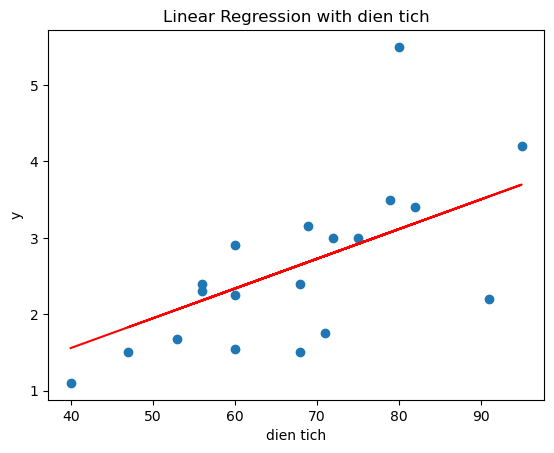

In [30]:
import matplotlib.pyplot as plt

# Perform linear regression with dientich
X = W[:, 0].reshape(-1, 1)
y = d
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Plot the data points
plt.scatter(X, y)
# Plot the linear regression line
plt.plot(X, X.dot(w), color='red')

# Add labels and title
plt.xlabel('dien tich')
plt.ylabel('y')
plt.title('Linear Regression with dien tich')


# Show the plot
plt.show()

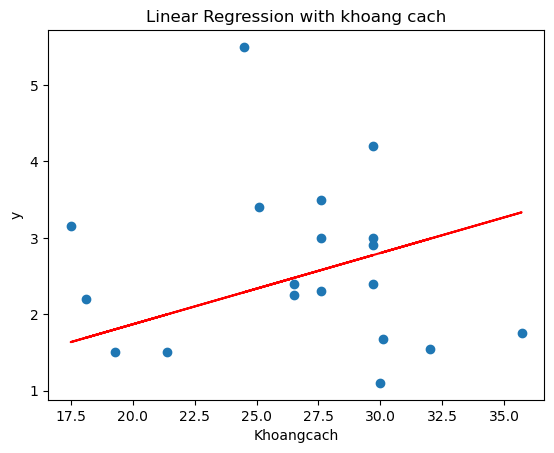

In [31]:
import matplotlib.pyplot as plt

# Perform linear regression with khoang cach so voi trung tam
X = W[:, 2].reshape(-1, 1)
y = d
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Plot the data points
plt.scatter(X, y)
# Plot the linear regression line
plt.plot(X, X.dot(w), color='red')

# Add labels and title
plt.xlabel('Khoangcach')
plt.ylabel('y')
plt.title('Linear Regression with khoang cach')


# Show the plot
plt.show()

Gradient Descent converged in 455 iterations.
Accelerated Gradient Descent converged in 197 iterations.
Stochastic Gradient Descent did not converge after 19000 iterations.
Predicted price using Gradient Descent: [3.03644036]
Predicted price using Accelerated Gradient Descent: [3.03644375]
Predicted price using Stochastic Gradient Descent: [3.83357509]


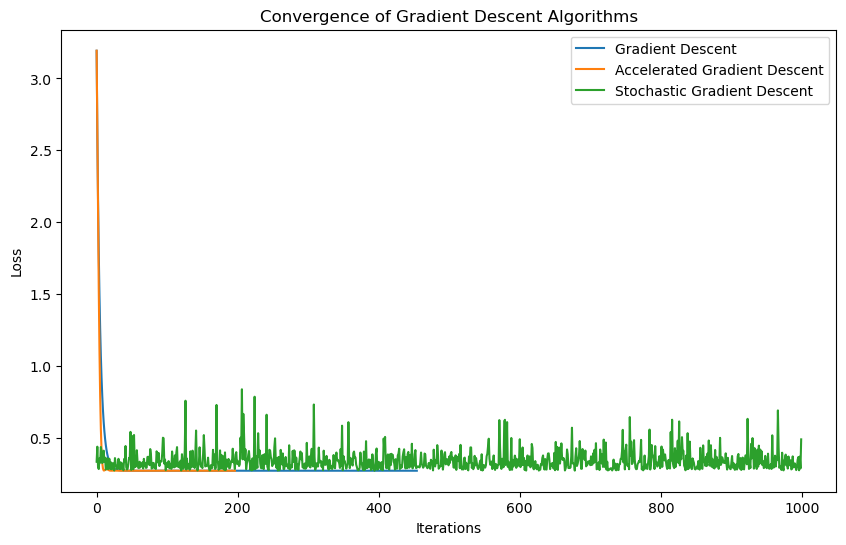

In [32]:
# b
df = pd.read_csv('data (1).csv')
def gradient_descent(X, y, learning_rate=0.1, num_iterations=1000, epsilon=1e-6):
    m, n = X.shape
    theta = np.zeros(n)
    loss_history = []
    for i in range(num_iterations):
        gradient = (1/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradient
        loss = (1/(2*m)) * np.sum((X.dot(theta) - y) ** 2)
        loss_history.append(loss)
        if np.linalg.norm(gradient, 2) < epsilon:
            print(f'Gradient Descent converged in {i+1} iterations.')
            break
    else:
        print(f'Gradient Descent did not converge after {num_iterations} iterations.')
    return theta, loss_history
def accelerated_gradient_descent(X, y, learning_rate=0.1, num_iterations=1000, epsilon=1e-6):
    m, n = X.shape
    theta = np.zeros(n)
    theta_prev = np.zeros(n)
    loss_history = []
    for i in range(1, num_iterations + 1):
        y_t = theta + (i - 2) / (i + 1) * (theta - theta_prev)
        gradient = (1/m) * X.T.dot(X.dot(y_t) - y)
        theta_new = y_t - learning_rate * gradient
        loss = (1/(2*m)) * np.sum((X.dot(theta_new) - y) ** 2)
        loss_history.append(loss)
        if np.linalg.norm(gradient, 2) < epsilon:
            print(f'Accelerated Gradient Descent converged in {i} iterations.')
            break
        theta_prev = theta
        theta = theta_new
    else:
        print(f'Accelerated Gradient Descent did not converge after {num_iterations} iterations.')
    return theta, loss_history
def stochastic_gradient_descent(X, y, learning_rate=0.1, num_iterations=1000, epsilon=1e-6):
    m, n = X.shape
    theta = np.zeros(n)
    loss_history = []
    for i in range(num_iterations):
        for j in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradient = xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradient
        loss = (1/(2*m)) * np.sum((X.dot(theta) - y) ** 2)
        loss_history.append(loss)
        if np.linalg.norm(gradient, 2) < epsilon:
            print(f'Stochastic Gradient Descent converged in {i * m + j + 1} iterations.')
            return theta, loss_history
    print(f'Stochastic Gradient Descent did not converge after {num_iterations * m} iterations.')
    return theta, loss_history
# Preprocess the data
# Assuming the data has columns 'size', 'bedrooms', 'distance', and 'price'

# Feature matrix X and target vector y
X = df[['Dien tich', 'So phong ngu', 'Khoang cach toi TT']].values
y = df['Gia'].values

# Normalize the features for better convergence
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a bias term (column of ones) to the feature matrix
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Train the models
theta_gd, loss_history_gd = gradient_descent(X, y)
theta_agd, loss_history_agd = accelerated_gradient_descent(X, y)
theta_sgd, loss_history_sgd = stochastic_gradient_descent(X, y)

# Normalize the input features
input_features = np.array([79, 2, 26.5]).reshape(1, -1)
input_features = scaler.transform(input_features)
input_features = np.hstack([np.ones((input_features.shape[0], 1)), input_features])

# Predict the price using the trained models
price_gd = input_features.dot(theta_gd)
price_agd = input_features.dot(theta_agd)
price_sgd = input_features.dot(theta_sgd)

print('Predicted price using Gradient Descent:', price_gd)
print('Predicted price using Accelerated Gradient Descent:', price_agd)
print('Predicted price using Stochastic Gradient Descent:', price_sgd)

# Vẽ hình
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(loss_history_gd, label='Gradient Descent')
plt.plot(loss_history_agd, label='Accelerated Gradient Descent')
plt.plot(loss_history_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Convergence of Gradient Descent Algorithms')
plt.legend()
plt.show()


In [33]:
# c
from sklearn.linear_model import LinearRegression

regr = LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(W, d)
print( 'Predicted price using scikit-learn:', regr.predict(np.array([[79, 2, 26.5, 1]])))


Predicted price using scikit-learn: [[3.03643884]]
